In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns

In [11]:
houses= pd.read_csv('../../datasets/Housing.csv')
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
houses['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [14]:
#typecasting categorical data from object to category
houses['mainroad']= houses['mainroad'].astype('category')
houses['guestroom']= houses['guestroom'].astype('category')
houses['basement']= houses['basement'].astype('category')
houses['hotwaterheating']= houses['hotwaterheating'].astype('category')
houses['airconditioning']= houses['airconditioning'].astype('category')
houses['prefarea']= houses['prefarea'].astype('category')
houses['furnishingstatus']= houses['furnishingstatus'].astype('category')

In [15]:
#updated dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [16]:
houses['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

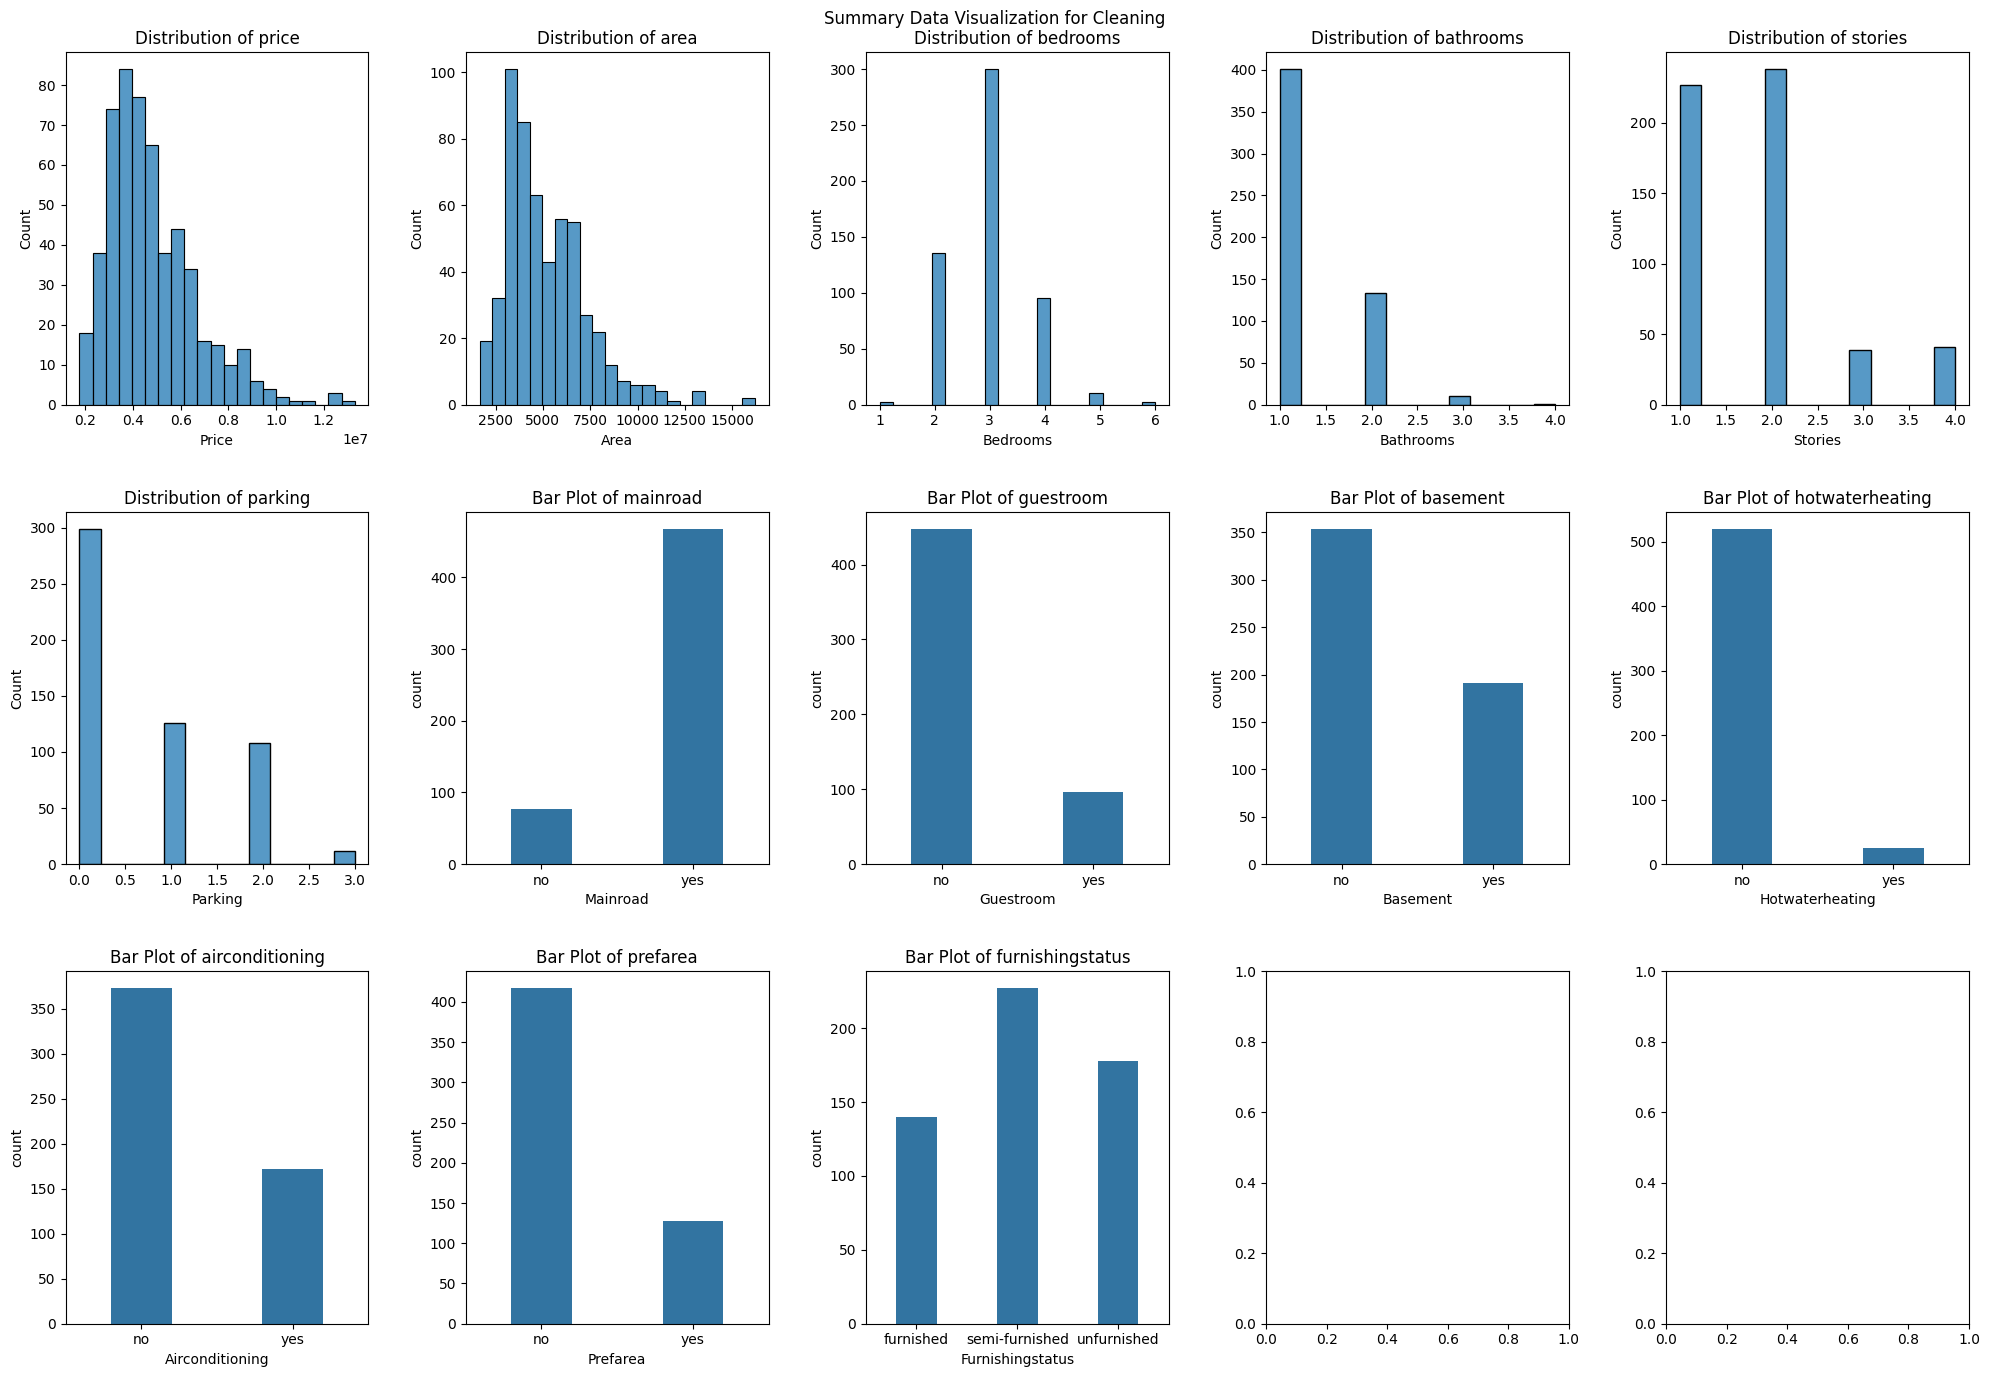

In [17]:
num_columns= houses.select_dtypes('int64').columns
categorical_columns= houses.select_dtypes('category').columns

fig, axes= plt.subplots(3,5, figsize= (20, 14))
axes= axes.flatten()

fig.suptitle('Summary Data Visualization for Cleaning')

for i, col in enumerate(num_columns):
    sns.histplot(data= houses, x= col, ax= axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col.capitalize())

offset= len(num_columns)

for i, col in enumerate(categorical_columns):
    j= offset + i
    sns.countplot(data= houses, x= col, ax= axes[j], width= 0.4)
    axes[j].set_title(f'Bar Plot of {col}')
    axes[j].set_xlabel(col.capitalize())

fig.tight_layout(h_pad= 3.0, w_pad= 3.0)

<Axes: xlabel='furnishingstatus', ylabel='count'>

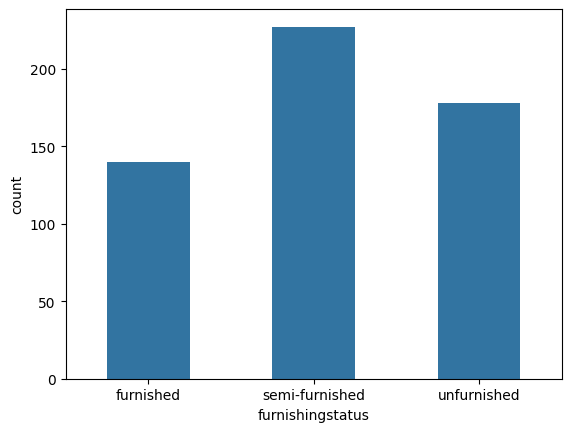

In [18]:
sns.countplot(data= houses, x= 'furnishingstatus' ,width= 0.5)


In [19]:
X_train= houses[['area','bedrooms','bathrooms','stories']].to_numpy()
Y_train= houses['price'].to_numpy().reshape(-1, 1)

In [20]:
def compute_cost(X_train, Y_train, W, b):
    m= len(Y_train)
    y_hat= (X_train @ W) + b
    cost= 1/(2*m) * np.sum((y_hat - Y_train)**2)
    return cost

In [21]:
def gradient_descent(X_train, Y_train, W_in, b_in, alpha, epochs):
    W= W_in.copy()
    b= b_in
    cost_hist= []
    m, n= X_train.shape

    for i in range(epochs):
        if i%10 == 0:
            cost_hist.append(compute_cost(X_train, Y_train, W, b))
        res= ((X_train @ W) + b) - Y_train 
        dJ_dW = (1/m)* (X_train.T @ res)
        dJ_db= (1/m) * np.sum(res)

        W= W- alpha* dJ_dW
        b= b- alpha* dJ_db
        
    return W, b, cost_hist
    

In [22]:
def norm(arr):
    mu= np.mean(arr, axis= 0)
    sigma= np.std(arr, axis=0)
    norm= (arr - mu)/ sigma
    return norm, mu, sigma

In [23]:
#normalizing features and target for smooth run
X_norm, x_mean, x_std= norm(X_train)
Y_norm, y_mean, y_std= norm(Y_train)

In [24]:
m, n= X_train.shape
W_in= np.zeros(n).reshape(-1, 1)
b_in= 0
W_norm , b_norm, cost_hist = gradient_descent(X_norm, Y_norm, W_in, b_in, 0.01, 15000)

In [25]:
x_labels= houses[['area','bedrooms','bathrooms','stories']].columns.values

In [26]:
W_norm, b_norm

(array([[0.44091592],
        [0.07824617],
        [0.32241309],
        [0.24654881]]),
 np.float64(3.0533781415599155e-16))

In [27]:
y_pred_norm= (X_norm @ W_norm) + b_norm
y_pred= (y_pred_norm.flatten() * y_std) + y_mean

In [28]:
#comparing results
print(f"Predicted value= {y_pred[0:5]}")
print(f'Actual value= {Y_train[0:5].flatten()}')

Predicted value= [ 7326017.92511889 10843211.50192757  7561389.4722578   6824824.87028826
  5594242.44267015]
Actual value= [13300000 12250000 12250000 12215000 11410000]


In [29]:
error= mean_absolute_percentage_error(Y_train, y_pred)
error

0.21109432397366135

In [30]:
errors= np.abs(((y_pred- Y_train.flatten())/Y_train.flatten()))*100
print(f'Min error= {errors.min()}')
print(f'Max error= {errors.max()}')

Min error= 0.09178193888930562
Max error= 138.94794391811047


In [31]:
# Find worst predictions
worst_idx = np.argmax(errors)
print(f"Worst prediction at index {worst_idx}:")
print(f"Predicted: {y_pred[worst_idx]}")
print(f"Actual: {Y_train[worst_idx]}")
print(f"Features: {X_train[worst_idx]}")

Worst prediction at index 499:
Predicted: 6356015.308221739
Actual: [2660000]
Features: [3630    3    3    2]


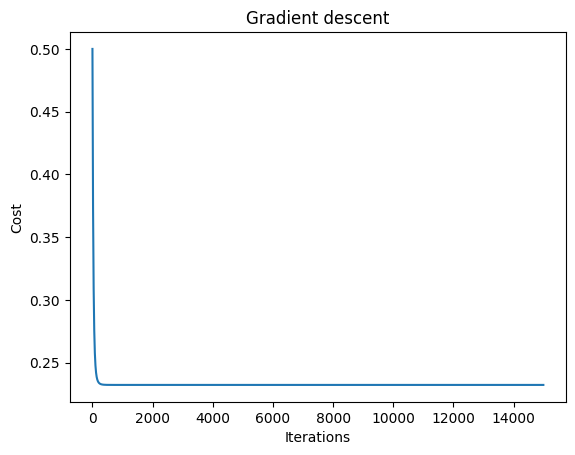

In [32]:
#plotting cost vs iterations
iters= np.arange(0, 15000, 10)
plt.plot(iters, cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient descent')
plt.show()

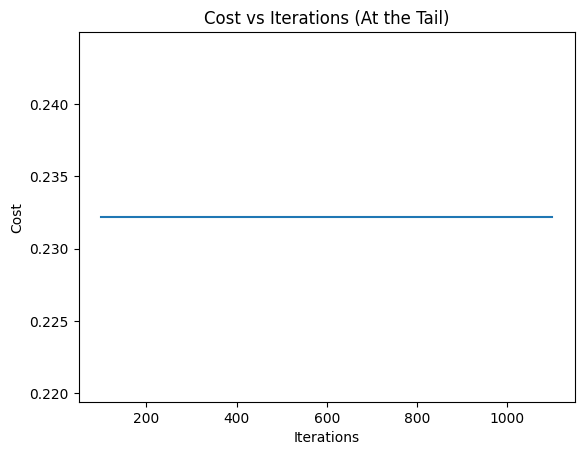

In [33]:
plt.plot(100+ np.arange(len(cost_hist[500:])), cost_hist[500:])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (At the Tail)')
plt.show()

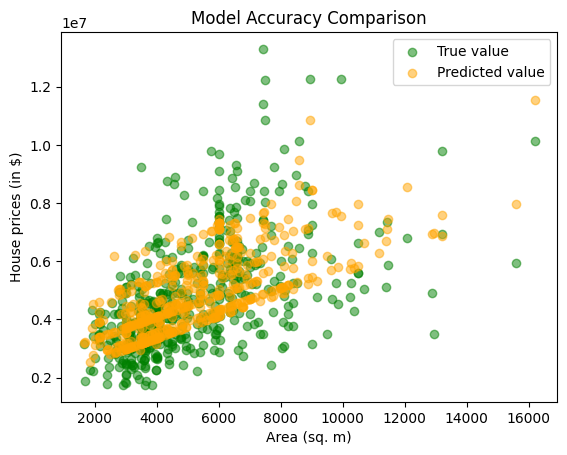

In [34]:
#plot to compare the plots based on just the area
plt.scatter(X_train[:, 0], Y_train, c= 'green', alpha=0.5, label= 'True value')
plt.scatter(X_train[:, 0], y_pred, c='orange', alpha= 0.5, label= 'Predicted value')
plt.xlabel('Area (sq. m)')
plt.ylabel('House prices (in $)')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()
